In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Training data
file_id = "1QpJeDYbW3r-Kc6pJVU7InQbumrx07vxi"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
df_train = pd.read_csv(download_url)

#Testing data
file_id1 = "10eBqcJ00SbwPCBUImJ5F7U5P1bPRZptJ"
download_url1 = f"https://drive.google.com/uc?export=download&id={file_id1}"
df_test = pd.read_csv(download_url1)

In [ ]:
import torch
print(torch.cuda.is_available())

False


In [ ]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
print(df_train.isna().sum())
print(df_test.isna().sum())

print((df_train.isna().sum() / len(df_train)) * 100)
print((df_test.isna().sum() / len(df_train)) * 100)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64
id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64
id           0.000000
keyword      0.341521
location    14.514646
text         0.000000
dtype: float64


In [ ]:
print(df_train['keyword'].value_counts())
print(df_train['location'].value_counts())

keyword
fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64
location
USA                   104
New York               71
United States          50
London                 45
Canada                 29
                     ... 
Silesia, Poland         1
Hickville, USA          1
New York NYC            1
Valle Del Sol           1
todaysbigstock.com      1
Name: count, Length: 3341, dtype: int64


In [ ]:
# fill NA
df_train['keyword'] = df_train['keyword'].fillna('unknown')
df_train['location'] = df_train['location'].fillna('unknown')
df_test['keyword'] = df_test['keyword'].fillna('unknown')
df_test['location'] = df_test['location'].fillna('unknown')

In [ ]:
# check for NA after filling unknown
print(df_train.isna().sum())
print(df_test.isna().sum())

print((df_train.isna().sum() / len(df_train)) * 100)
print((df_test.isna().sum() / len(df_train)) * 100)

id          0
keyword     0
location    0
text        0
target      0
dtype: int64
id          0
keyword     0
location    0
text        0
dtype: int64
id          0.0
keyword     0.0
location    0.0
text        0.0
target      0.0
dtype: float64
id          0.0
keyword     0.0
location    0.0
text        0.0
dtype: float64


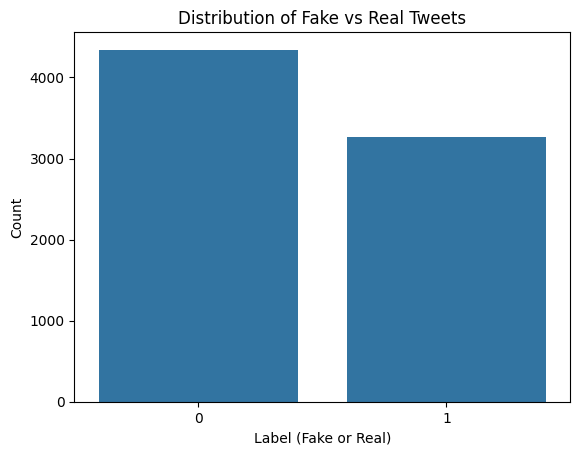

In [ ]:
sns.countplot(x='target', data=df_train)
plt.title('Distribution of Fake vs Real Tweets')
plt.xlabel('Label (Fake or Real)')
plt.ylabel('Count')
plt.show()

In [ ]:
# text lenght
df_train['text_length'] = df_train['text'].apply(len)
df_test['text_length'] = df_test['text'].apply(len)

In [ ]:
print(df_train.head())
# print(df_test.head())

   id  keyword location                                               text  \
0   1  unknown  unknown  Our Deeds are the Reason of this #earthquake M...   
1   4  unknown  unknown             Forest fire near La Ronge Sask. Canada   
2   5  unknown  unknown  All residents asked to 'shelter in place' are ...   
3   6  unknown  unknown  13,000 people receive #wildfires evacuation or...   
4   7  unknown  unknown  Just got sent this photo from Ruby #Alaska as ...   

   target  text_length  
0       1           69  
1       1           38  
2       1          133  
3       1           65  
4       1           88  


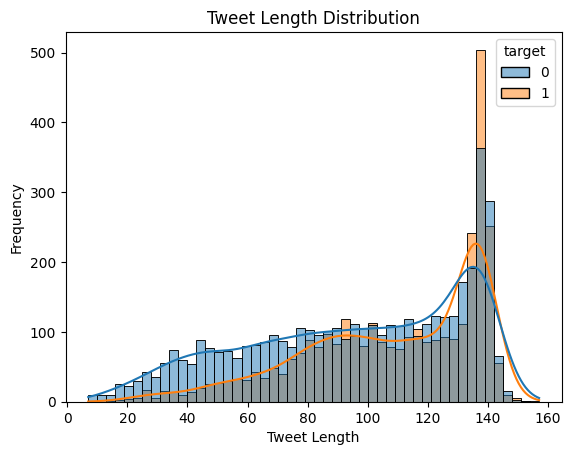

In [ ]:

sns.histplot(data=df_train, x='text_length', hue='target', bins=50, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()
# Max real tweets are near max limit of text of twitter (140/280)


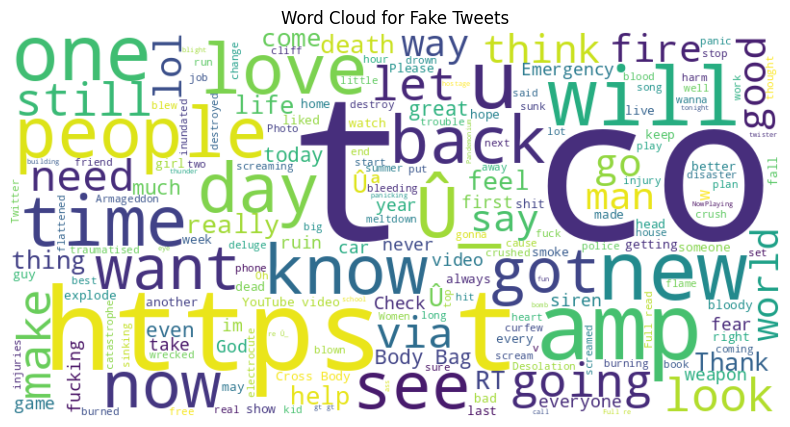

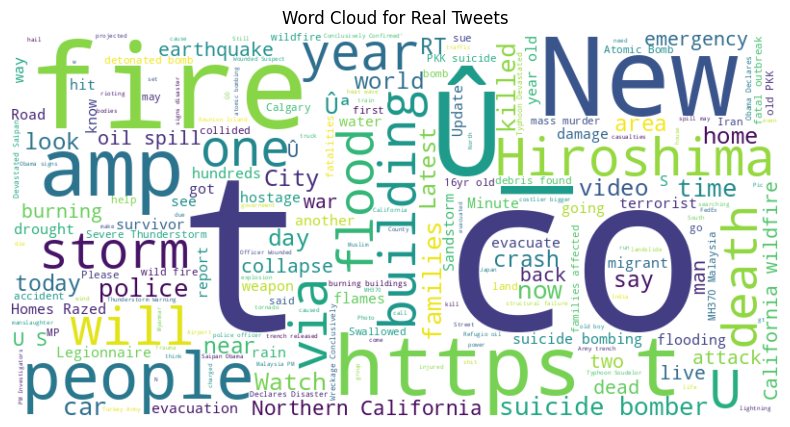

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

# For FAKE tweets
fake_text = ' '.join(df_train[df_train['target'] == 0]['text'])
if fake_text.strip():
    wc_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc_fake, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Fake Tweets')
    plt.show()
else:
    print("No fake tweets found.")

# for REAL tweets
real_text = ' '.join(df_train[df_train['target'] == 1]['text'])
if real_text.strip():
    wc_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc_real, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Real Tweets')
    plt.show()
else:
    print("No real tweets found.")


In [ ]:
# !pip install nltk spacy
# !python3 -m spacy download en_core_web_sm

In [ ]:
# !pip uninstall spacy -y
# !pip install spacy --upgrade
# !python3 -m spacy download en_core_web_sm

In [ ]:
# !python3 -m spacy validate
# !python3 -m spacy download en_core_web_sm --force

In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def preprocess(text):
    # Lowercase
    text = text.lower()

    # Remove URLs and extra special characters
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization using SpaCy
    doc = nlp(" ".join(tokens))
    lemmatized = [token.lemma_ for token in doc]

    return " ".join(lemmatized)


In [ ]:
df_train['clean_text'] = df_train['text'].apply(preprocess)
df_test['clean_text'] = df_test['text'].apply(preprocess)

In [ ]:
df_train.head()

,id,keyword,location,text,target,text_length,clean_text
0,1,unknown,unknown,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason may allah forgiv
1,4,unknown,unknown,Forest fire near La Ronge Sask. Canada,1,38,forest fire near rong sask canada
2,5,unknown,unknown,All residents asked to 'shelter in place' are ...,1,133,resid ask shelter place notifi offic evacu she...
3,6,unknown,unknown,"13,000 people receive #wildfires evacuation or...",1,65,peopl receiv evacu order california
4,7,unknown,unknown,Just got sent this photo from Ruby #Alaska as ...,1,88,get send photo rubi smoke pour school


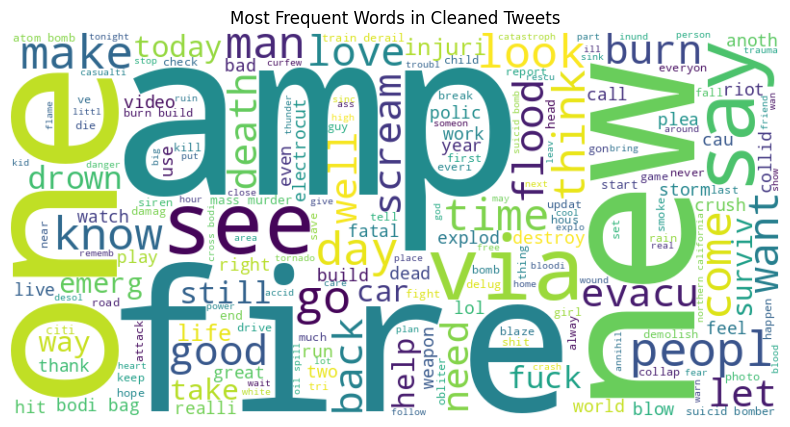

In [ ]:
# Combine all clean text into one string
all_words = " ".join(df_train['clean_text'])

# wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Cleaned Tweets')
plt.show()


**Using TF-IDF**

In [ ]:
# TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)


X_tfidf = tfidf.fit_transform(df_train['clean_text'])

X_tfidf_test = tfidf.transform(df_test['clean_text'])

y = df_train['target']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Logistic Regression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr,
                       cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)



# SVM
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

random_svm = RandomizedSearchCV(SVC(), param_distributions=param_dist_svm,
                                n_iter=10, scoring='f1', cv=5,
                                verbose=1, random_state=42, n_jobs=-1)
random_svm.fit(X_train, y_train)



# Naive bays
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0],
    'fit_prior': [True, False]
}

grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='f1', n_jobs=-1, verbose=1)

grid_nb.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0],
                         'fit_prior': [True, False]},
             scoring='f1', verbose=1)

**Using BERT**

In [ ]:
from transformers import BertTokenizer, BertModel

# pre-trained BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")
bert_model.eval()


/home/astroboy/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_bert_embeddings(text_list, batch_size=64):
    embeddings = []
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=64)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]
        embeddings.append(cls_embeddings.cpu())
    return torch.cat(embeddings).numpy()

X = get_bert_embeddings(df_train['clean_text'].tolist())
X_final_test = get_bert_embeddings(df_test['clean_text'].tolist())
y = df_train['target']

In [ ]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/astroboy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astroboy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astroboy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astroboy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astroboy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astroboy/.local/lib/python3.10/site-packages/sklearn/linear_mode

Best LR Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

📊 Evaluation for Logistic Regression (Tuned)
Accuracy: 0.7747866053841103
Precision: 0.7684210526315789
Recall: 0.674884437596302
F1 Score: 0.7186218211648893

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       874
           1       0.77      0.67      0.72       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.77      1523
weighted avg       0.77      0.77      0.77      1523



/home/astroboy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


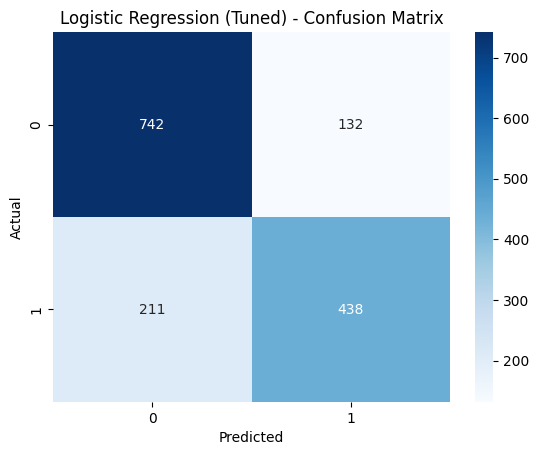

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best SVM Params: {'C': np.float64(8.424426408004217), 'gamma': 'auto', 'kernel': 'rbf'}

📊 Evaluation for SVM (Tuned)
Accuracy: 0.7859487852921865
Precision: 0.8148148148148148
Recall: 0.6440677966101694
F1 Score: 0.7194492254733219

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       874
           1       0.81      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523



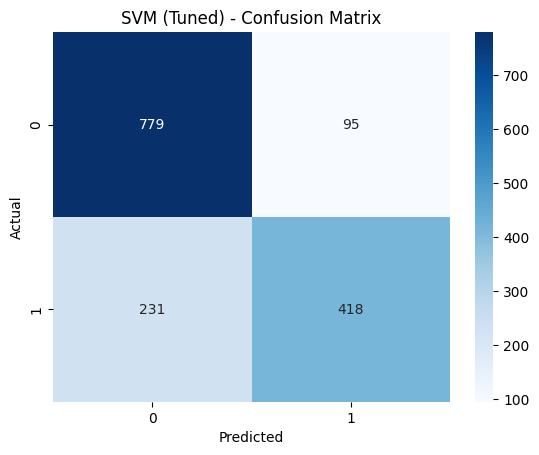

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr,
                       cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best LR Params:", grid_lr.best_params_)
y_val_pred_lr = grid_lr.predict(X_val)
evaluate_model(y_val, y_val_pred_lr, "Logistic Regression (Tuned)")


# SVM
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

random_svm = RandomizedSearchCV(SVC(), param_distributions=param_dist_svm,
                                n_iter=10, scoring='f1', cv=5,
                                verbose=1, random_state=42, n_jobs=-1)
random_svm.fit(X_train, y_train)

print("Best SVM Params:", random_svm.best_params_)
y_val_pred_svm = random_svm.predict(X_val)
evaluate_model(y_val, y_val_pred_svm, "SVM (Tuned)")


# Naive bays is Not suitable for BERT embeddings

**Evaluation for TF-IDF**

Best LR Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

📊 Evaluation for Logistic Regression (Tuned)
Accuracy: 0.8135259356533159
Precision: 0.8451492537313433
Recall: 0.6926605504587156
F1 Score: 0.761344537815126

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       869
           1       0.85      0.69      0.76       654

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.82      0.81      0.81      1523



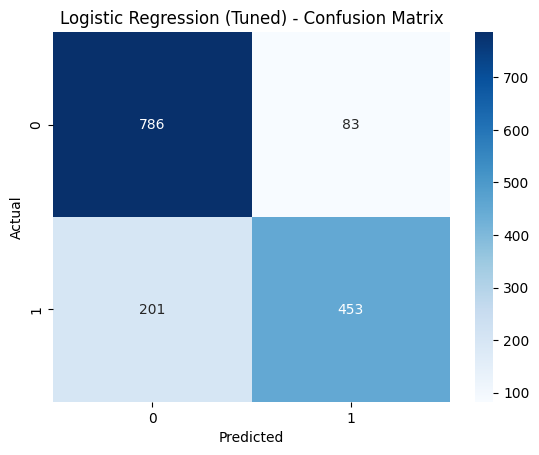

Best SVM Params: {'C': np.float64(1.6601864044243653), 'gamma': 'scale', 'kernel': 'linear'}

📊 Evaluation for SVM (Tuned)
Accuracy: 0.7879185817465528
Precision: 0.7744610281923715
Recall: 0.7140672782874617
F1 Score: 0.7430389817024662

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       869
           1       0.77      0.71      0.74       654

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



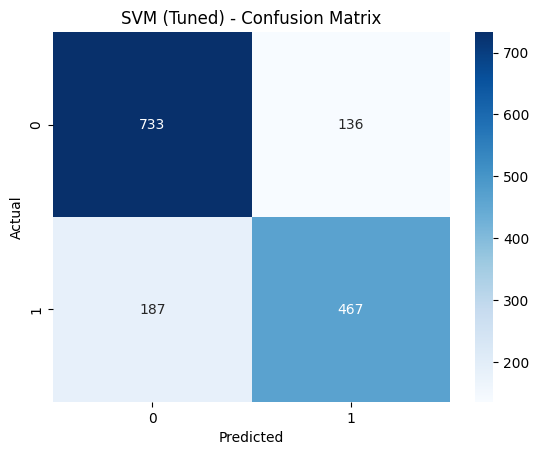

Best NB Params: {'alpha': 1.0, 'fit_prior': False}

📊 Evaluation for Multinomial Naive Bayes (Tuned)
Accuracy: 0.793827971109652
Precision: 0.7631578947368421
Recall: 0.753822629969419
F1 Score: 0.7584615384615384

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       869
           1       0.76      0.75      0.76       654

    accuracy                           0.79      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.79      0.79      0.79      1523



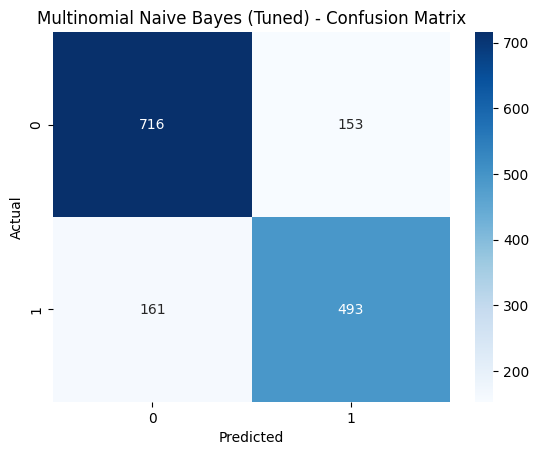

In [ ]:
# Evaluation
print("Best LR Params:", grid_lr.best_params_)
y_val_pred_lr = grid_lr.predict(X_val)
evaluate_model(y_val, y_val_pred_lr, "Logistic Regression (Tuned)")


print("Best SVM Params:", random_svm.best_params_)
y_val_pred_svm = random_svm.predict(X_val)
evaluate_model(y_val, y_val_pred_svm, "SVM (Tuned)")


print("Best NB Params:", grid_nb.best_params_)
y_val_pred_nb = grid_nb.predict(X_val)
evaluate_model(y_val, y_val_pred_nb, "Multinomial Naive Bayes (Tuned)")

In [ ]:
y_test_pred_lr = grid_lr.predict(X_tfidf_test)
y_test_pred_svm = random_svm.predict(X_tfidf_test)
y_test_pred_nb = grid_nb.predict(X_tfidf_test)

# Add to DataFrame and export
df_test['predicted_label(logistic)'] = y_test_pred_lr
df_test['predicted_label(svm)'] = y_test_pred_svm
df_test['predicted_label(nb)'] = y_test_pred_nb

df_test.to_csv("test_predictions(TF-IDF).csv", index=False)

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_roc_pr_curves(model, X_val, y_val, model_name):
    # Get prediction probabilities
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_val)[:, 1]
    else:
        # fallback for SVM without `predict_proba`
        probs = model.decision_function(X_val)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, probs)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_val, probs)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision)
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    plt.tight_layout()
    plt.show()


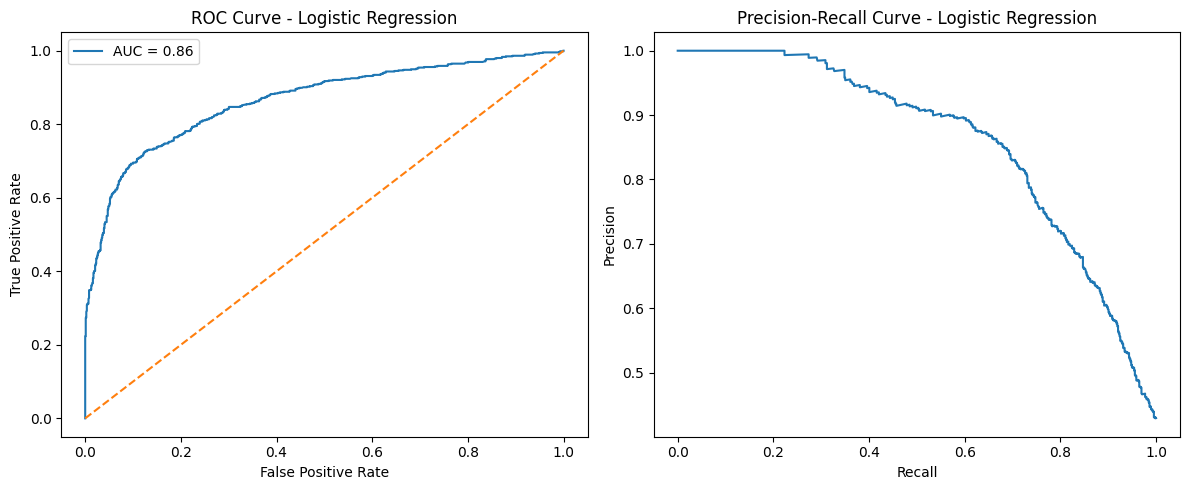

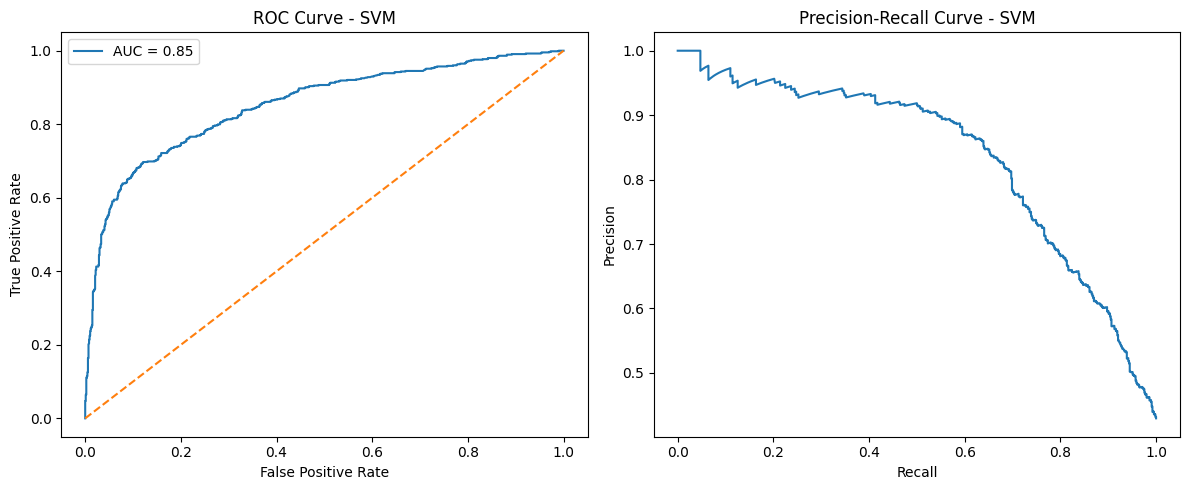

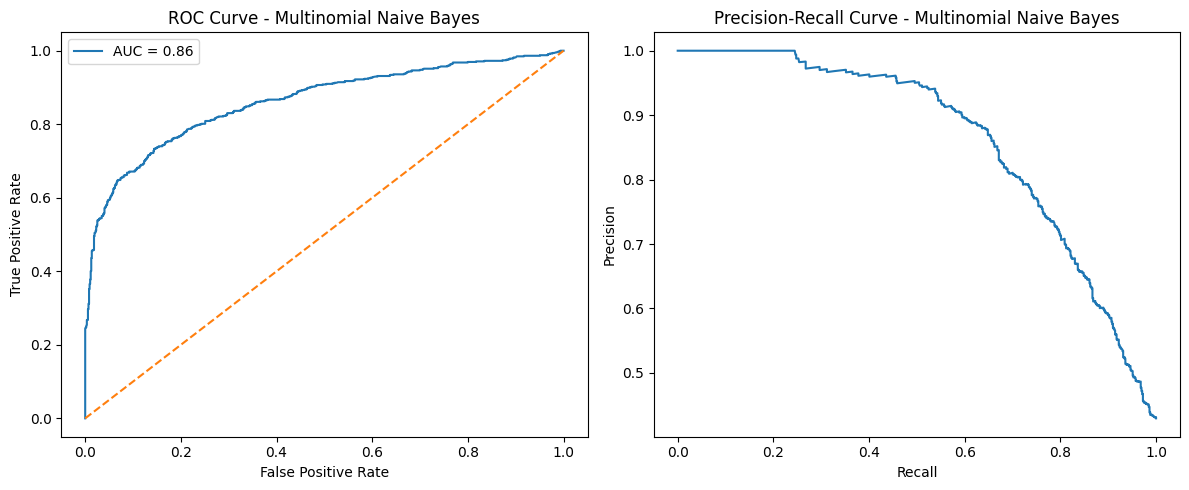

In [ ]:
# ROC and PR Curve Plots
plot_roc_pr_curves(grid_lr, X_val, y_val, "Logistic Regression")
plot_roc_pr_curves(random_svm, X_val, y_val, "SVM")
plot_roc_pr_curves(grid_nb, X_val, y_val, "Multinomial Naive Bayes")


**Evaluation for BERT**

In [ ]:
y_test_pred_lr = grid_lr.predict(X_final_test)

df_test['predicted_label'] = y_test_pred_lr
df_test.to_csv("test_predictions(bert).csv", index=False)

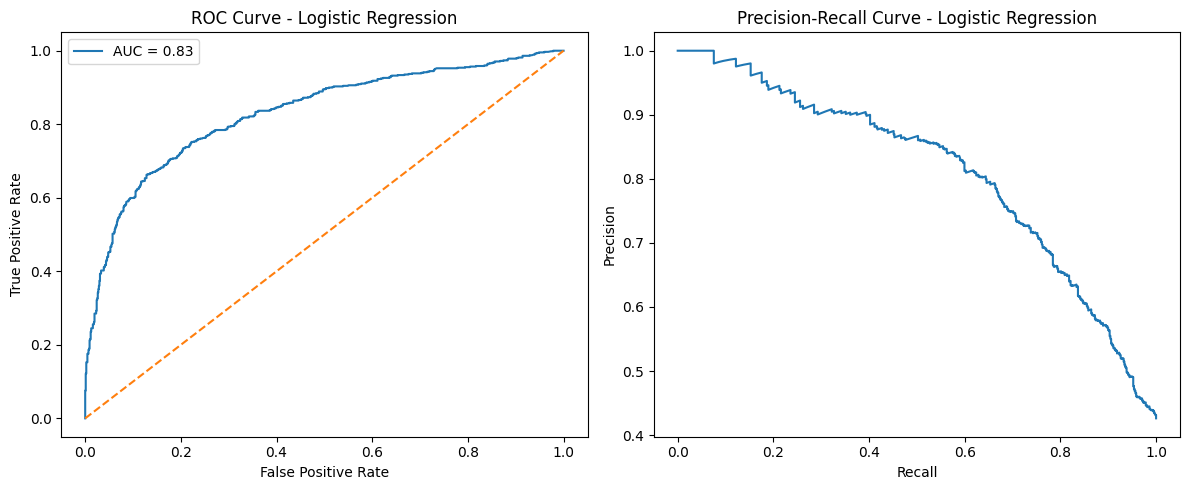

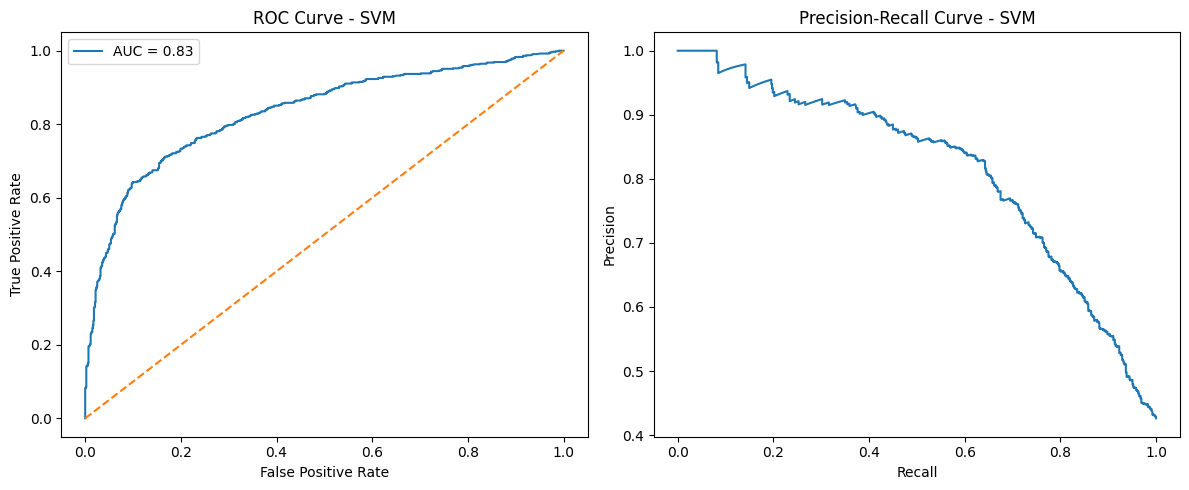

In [ ]:
# ROC and PR Curve Plots
plot_roc_pr_curves(grid_lr, X_val, y_val, "Logistic Regression")
plot_roc_pr_curves(random_svm, X_val, y_val, "SVM")

In [ ]:
# First, do the split with return_index=True

X_train, X_val, y_train, y_val = train_test_split(

    X_tfidf, y, test_size=0.2, random_state=42, stratify=y

)



# This gives us validation predictions

y_val_pred_lr = grid_lr.predict(X_val)



# Create a DataFrame to track misclassified samples

val_indices = y_val.index  # these are the original indices from df_train

misclassified = df_train.loc[val_indices[(y_val != y_val_pred_lr)]]

# Add the predicted labels to the misclassified DataFrame
misclassified['predicted_label'] = y_val_pred_lr[y_val != y_val_pred_lr]


# Display some misclassified examples

print("🔍 Misclassified Tweets (Logistic Regression):\n")

for _, row in misclassified.head(5).iterrows():

    print(f"Tweet: {row['text']}")

    # Access original target and predicted label from the misclassified DataFrame
    print(f"Actual: {row['target']} | Predicted: {row['predicted_label']}\n")

🔍 Misclassified Tweets (Logistic Regression):

Tweet: @TheEconomist Step one: get that mass murderer's portrait off the yuan.
Actual: 0 | Predicted: 1

Tweet: Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/tyyfG4qQvM
Actual: 1 | Predicted: 0

Tweet: Thu Aug 06 2015 01:20:32 GMT+0000 (UTC)
#millcityio #20150613
theramin sirens
Actual: 1 | Predicted: 0

Tweet: I can't drown my demons they know how to swim
Actual: 1 | Predicted: 0

Tweet: @XHNews We need these plants in the pacific during the cyclone seasons it would help
Actual: 1 | Predicted: 0



In [ ]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


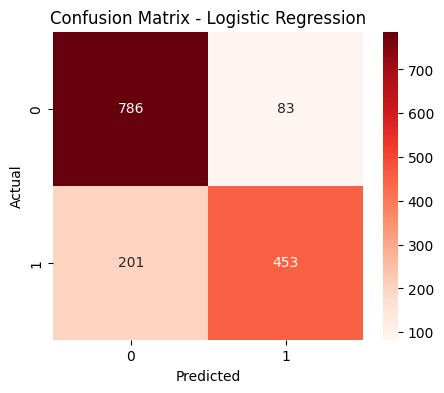

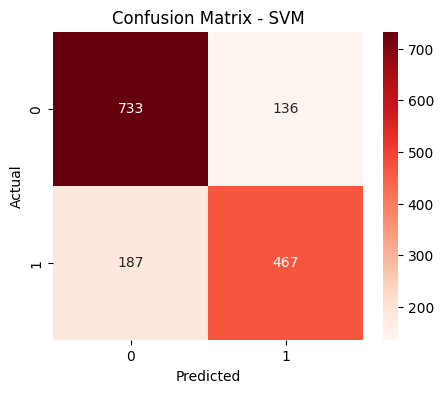

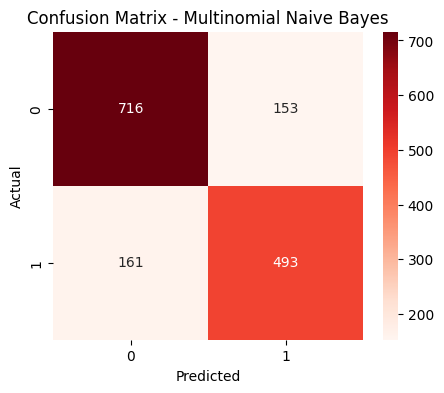

In [ ]:
plot_confusion(y_val, y_val_pred_lr, "Logistic Regression")
plot_confusion(y_val, y_val_pred_svm, "SVM")
plot_confusion(y_val, y_val_pred_nb, "Multinomial Naive Bayes")
